# "Barcode" Distance on Intervals

In [1]:
import Interval_Matrix_Algebra_Calculator_v0 as imac
import portion as P
import dionysus as d
import numpy as np 
from itertools import permutations

import matplotlib.pyplot as plt


## Generate Simulations

### Setup Base

In [2]:
from os_utilities import *
from orb_builder import *

orb_filenames = [] # used to keep track of what files to feed into soap

folder_name = "sim-2022-11-13"
prefix = "" # earth / moon / mars
n = 5 # number of simulations to generate
k = 40 # number of satellites to sample from starlink

folder = "./outputs/" + folder_name
make_folder(folder)

starlink = build_satellites_csv("starlink")
moon_sats = get_moon_platforms()
mars_sats = get_mars_platforms()
ground = [
    create_ground_object_dictionary("Ground-Albany", 42.685012663456163, -73.82479012295363, 0),
    create_ground_object_dictionary("Ground-Sydney", -33.868888888888889, 151.20939697339508, 0)
]
norad = build_satellites_from_tle("./sources/tdrss.tle")

### Create Starlink System

In [3]:
name = "starlink_a"
satellites = sample_sats(starlink, k)
save_to_outputs_file(
        generate_orb(satellites, name),
        folder_name + "/" + name, "orb")
name = "starlink_b"
satellites = sample_sats(starlink, k)
save_to_outputs_file(
        generate_orb(satellites, name),
        folder_name + "/" + name, "orb")

0

### Run Soap

In [4]:
orb_files = get_ext_files(folder, "orb")
orb_filenames = []
for orb_file in orb_files:
    orb_filenames.append(orb_file.split("/")[-1])
# print(orb_filenames)

In [5]:
import subprocess

command = "wine"
soap_path = "/home/zeno/.wine/drive_c/SOAP/bin64/soap.exe"

for filename in orb_filenames:
#     print(filename)

    orb_path = "" + folder + "/" + filename + ""
    process = subprocess.Popen([command, soap_path, orb_path])
    # process = subprocess.Popen([command, soap_path, orb_path], stdout=subprocess.DEVNULL, stderr=subprocess.STDOUT)
    process.wait()

0084:fixme:hid:handle_IRP_MN_QUERY_ID Unhandled type 00000005
0084:fixme:hid:handle_IRP_MN_QUERY_ID Unhandled type 00000005
0084:fixme:hid:handle_IRP_MN_QUERY_ID Unhandled type 00000005
0084:fixme:hid:handle_IRP_MN_QUERY_ID Unhandled type 00000005
0114:fixme:tasklist:wmain stub: L"tasklist" L"/nh" L"/fo" L"csv" L"/fi" L"Imagename eq soap64.exe" L"/fi" L"Status eq Running"
00e4:fixme:wintab32:x11drv_tablet_info Return proper size
00e4:fixme:win:NtUserFlashWindowEx 0x11f190 - semi-stub
006c:fixme:imm:ImeSetActiveContext (0000000000010026, 0): stub
006c:fixme:imm:ImmReleaseContext (0000000000010020, 0000000000010026): stub
00e4:fixme:imm:ImeSetActiveContext (0000000000020046, 1): stub
00e4:fixme:imm:ImmReleaseContext (000000000001006E, 0000000000020046): stub
00e4:fixme:win:RegisterTouchWindow (000000000001006E 00000000): stub
00e4:fixme:wgl:X11DRV_wglGetPixelFormatAttribivARB unsupported 2008 WGL Attribute
00e4:fixme:msg:pack_message msg 80 (WM_SETICON) not supported yet
00e4:fixme:msg:p

In [6]:
filename = folder + "/starlink_a Contact Analysis.csv"
A = imac.soapConverter(filename)
filename = folder + "/starlink_b Contact Analysis.csv"
B = imac.soapConverter(filename)

print("len(A) = {}, len(B) = {}".format(len(A), len(B)))
m = len(A)

start_time = 0
end_time = 86400

# TODO : change B to be R in each entry.

def unit_matrix(m): # , start_time, end_time
    matrix = []
    for i in range(m):
        row = []
        for j in range(m):
            row.append(P.closed(-P.inf, P.inf))
        matrix.append(row)
    return matrix
        
B = unit_matrix(m)
# print(U)

len(A) = 40, len(B) = 40


In [7]:
from distances_tvg import *

In [8]:
# def tvg_to_diagram_matrix(A, start_time, end_time):
#     m = len(A)
#     diagram = []
#     for i in range(m):
#         diagram.append([])
#         for j in range(m):
#             # print("A({}, {}) =".format(i, j))
#             intervals = list(A[i][j])
#             diagram_ij = d.Diagram()
#             for interval in intervals:
#                 lower = interval.lower
#                 upper = interval.upper

#                 # check if emptyset?
#                 if lower == P.inf and upper == -P.inf:
#                     continue

#                 # check if interval is R
#                 if lower == -P.inf:
#                     lower = start_time
#                 if upper == P.inf:
#                     upper = end_time

#                 # print("\t[{}, {}]".format(lower, upper))
#                 diagram_ij.append(d.DiagramPoint(lower, upper))
#             diagram[i].append(diagram_ij)
#     return diagram

# def tvg_to_complement_diagram_matrix(A, start_time, end_time):
#     m = len(A)
#     diagram = []
#     for i in range(m):
#         diagram.append([])
#         for j in range(m):
#             intervals = list(A[i][j])
#             diagram_ij = d.Diagram()
#             # print(intervals)
#             intervals_c = []
            
#             lower = start_time           
#             for interval in intervals:
                
#                 # check if emptyset?
#                 if interval.lower == P.inf and interval.upper == -P.inf:
#                     continue
                
#                 upper = interval.lower
                
#                 # check if interval is R
#                 if interval.lower == -P.inf:
#                     upper = start_time
                
#                 # print(interval)
#                 intervals_c.append([lower, upper])
#                 # print("({}, {})".format(lower, upper))
        
#                 # manually remove singletons to avoid dionysus2 bug
#                 if lower != upper:
#                     diagram_ij.append(d.DiagramPoint(lower, upper))
                
#                 lower = interval.upper
#                 if interval.upper == P.inf:
#                     lower = end_time
                    
#             intervals_c.append([lower, end_time])
#             # print("complement : {}".format(intervals_c))
            
#             # manually remove singletons to avoid dionysus2 bug
#             if lower != end_time:
#                 diagram_ij.append(d.DiagramPoint(lower, end_time))
#             diagram[i].append(diagram_ij)
#     return diagram

diagram_a = tvg_to_diagram_matrix(A, start_time, end_time)
diagram_b = tvg_to_diagram_matrix(B, start_time, end_time)

# diagram_a_comp = tvg_to_complement_diagram_matrix(A, start_time, end_time)
# diagram_b_comp = tvg_to_complement_diagram_matrix(B, start_time, end_time)

# print(diagram_a_comp)
# print(diagram_b_comp)

diagram_a = tvg_to_complement_diagram_matrix(A, start_time, end_time)
diagram_b = tvg_to_complement_diagram_matrix(B, start_time, end_time)

# print(len(diagram_a[0]))

In [9]:
# def tvg_interval_wasserstein_distance_matrix(diagram_a, diagram_b, m, q = 2):
#     wdist = []
#     for i in range(m):
#         wdist.append([])
#         for j in range(m):
#             diagram_aij = diagram_a[i][j]
#             diagram_bij = diagram_b[i][j]
#             # print(diagram_aij)
#             # print(diagram_bij)
            
#             wdist[i].append(d.wasserstein_distance(diagram_aij, diagram_bij, q=q))
#             # print("2-Wasserstein distance between ({}, {})-intervals: {}".format(i, j, wdist[i][j]))

#     return wdist
            
# def tvg_interval_bottleneck_distance_matrix(diagram_a, diagram_b, m):
#     bdist = []
#     for i in range(m):
#         bdist.append([])
#         for j in range(m):
#             diagram_aij = diagram_a[i][j]
#             diagram_bij = diagram_b[i][j]
#             # print(diagram_aij)
#             # print(diagram_bij)
            
#             bdist[i].append(d.bottleneck_distance(diagram_aij, diagram_bij))
#             # print("Bottleneck distance between ({}, {})-intervals: {}".format(i, j, bdist[i][j]))
            
#     return bdist

### Define $\ell^q$ norms for $p \in [1, \infty]$

In [10]:
# def sup_norm(distance_matrix):
#     """
#     Given a square matrix `distance_matrix` as a list of lists, return the $\ell^\infty$-norm.
#     """
#     m = len(distance_matrix)
    
#     supremum = float("-inf")
#     for i in range(m):
#         for j in range(m):
#             entry = distance_matrix[i][j]
#             supremum = max(supremum, entry)
#     return supremum

# def q_norm(distance_matrix, q):
#     """
#     Given a square matrix `distance matrix` as a list of lists, return the $\ell^q$-norm,
#         with `q` a float in [1, float("inf"))
#     """
    
#     m = len(distance_matrix)
    
#     summation = 0
#     for i in range(m):
#         for j in range(m):
#             entry = distance_matrix[i][j]
#             summation += pow(entry, q)
#     return pow(summation, 1/q)

### Calculate Distances Between A and B

In [11]:
wdist = tvg_interval_wasserstein_distance_matrix(diagram_a, diagram_b, m, 2)
bdist = tvg_interval_bottleneck_distance_matrix(diagram_a, diagram_b, m)
       
print("bdist_sup = {}".format(sup_norm(bdist)))
print("wdist_sup = {}".format(sup_norm(wdist)))

q = 2
print("wdist_q = {}, for q = {}".format(q_norm(wdist, q), q))
# print("bdist_q = {}, for q = {}".format(q_norm(bdist, q), q)) # maybe this one doesn't make sense?


bdist_sup = 43260.515625
wdist_sup = 43200.0
wdist_q = 1405060.4563411667, for q = 2


## Distance on $k$-Walk TVG's

In [12]:
n = 10
q = 2

x = list(range(n))
y_wdist = [0 for i in x]
y_bdist = [0 for i in x]

for k in range(n):
    print("Calculating {}-walks".format(k))
    
    A_k = imac.matrix_k_walk(A, k)
    B_k = B # imac.matrix_k_walk(B, k)
    
    # diagram_a_k = tvg_to_diagram_matrix(A_k, start_time, end_time)
    # diagram_b_k = tvg_to_diagram_matrix(B_k, start_time, end_time)
    
    diagram_a_k = tvg_to_complement_diagram_matrix(A_k, start_time, end_time)
    diagram_b_k = tvg_to_complement_diagram_matrix(B_k, start_time, end_time)
    
    wdist = tvg_interval_wasserstein_distance_matrix(diagram_a_k, diagram_b_k, m, 2)
    y_wdist[k] = q_norm(wdist, q)

    bdist = tvg_interval_bottleneck_distance_matrix(diagram_a_k, diagram_b_k, m)
    y_bdist[k] = sup_norm(bdist)

    print("d_B(A^{0}, B^{0}) = {1}".format(k, sup_norm(bdist)))
    print("d_W^2,infty(A^{0}, B^{0}) = {1}".format(k, sup_norm(wdist)))
    print("d_W^2,q(A^{0}, B^{0}) = {1}, q = {2}".format(k, q_norm(wdist, q), q))

# fig, ax = plt.subplots(1, 2, figsize=(8, 6))
# ax[0].set_xlabel('k')
# ax[0].set_ylabel('seconds')
# ax[0].set_title('{}-Wasserstein Distance from $k$-Walk Complement Matrix to Unit'.format(q), fontsize=15)
# ax[0].plot(x, y_wdist, 'bo--', linewidth=2)

# ax[1].set_xlabel('k')
# ax[1].set_ylabel('seconds')
# ax[1].set_title('Bottleneck Distance from $k$-Walk Complement Matrix to Unit', fontsize=15)
# ax[1].plot(x, y_bdist, 'bo--', linewidth=2)

# plt.show()

Calculating 0-walks
d_B(A^0, B^0) = 43260.515625
d_W^2,infty(A^0, B^0) = 43200.0
d_W^2,q(A^0, B^0) = 1405060.4563411667, q = 2
Calculating 1-walks
d_B(A^1, B^1) = 43260.515625
d_W^2,infty(A^1, B^1) = 43200.0
d_W^2,q(A^1, B^1) = 1405060.4563411667, q = 2
Calculating 2-walks
d_B(A^2, B^2) = 43200.0
d_W^2,infty(A^2, B^2) = 43200.0
d_W^2,q(A^2, B^2) = 1141920.830511097, q = 2
Calculating 3-walks
d_B(A^3, B^3) = 43200.0
d_W^2,infty(A^3, B^3) = 43200.0
d_W^2,q(A^3, B^3) = 816879.8904976216, q = 2
Calculating 4-walks
d_B(A^4, B^4) = 43200.0
d_W^2,infty(A^4, B^4) = 43200.0
d_W^2,q(A^4, B^4) = 497717.5906891005, q = 2
Calculating 5-walks
d_B(A^5, B^5) = 17880.38671875
d_W^2,infty(A^5, B^5) = 20811.419921875
d_W^2,q(A^5, B^5) = 319975.6825313031, q = 2
Calculating 6-walks
d_B(A^6, B^6) = 7094.9189453125
d_W^2,infty(A^6, B^6) = 14586.787109375
d_W^2,q(A^6, B^6) = 272778.7154579267, q = 2
Calculating 7-walks
d_B(A^7, B^7) = 7084.05419921875
d_W^2,infty(A^7, B^7) = 13831.5146484375
d_W^2,q(A^7, B^7

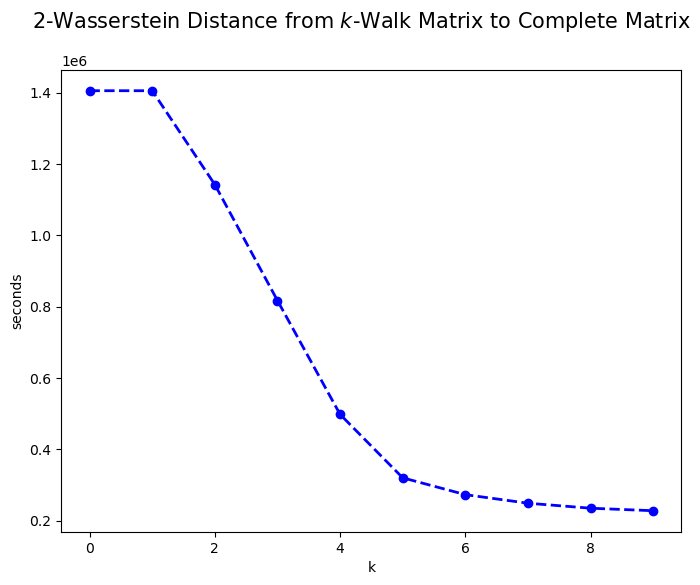

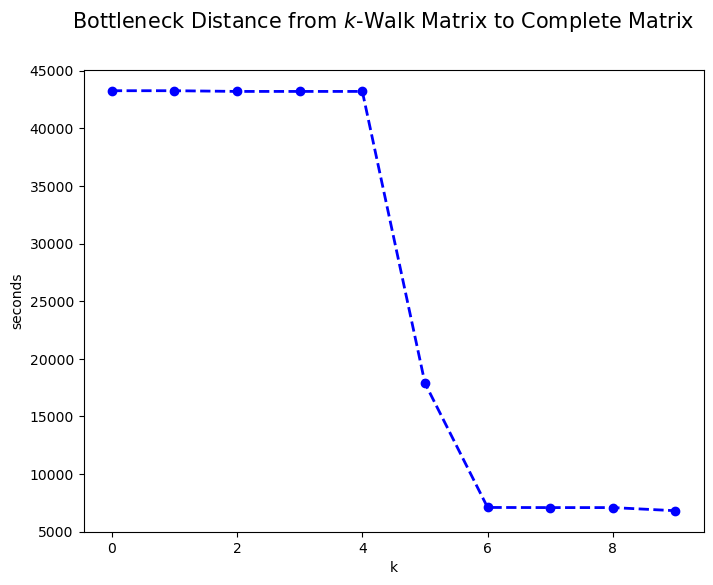

In [13]:
fig, ax = plt.subplots(1, figsize=(8, 6))
ax.set_xlabel('k')
ax.set_ylabel('seconds')
fig.suptitle('{}-Wasserstein Distance from $k$-Walk Matrix to Complete Matrix'.format(q), fontsize=15)
ax.plot(x, y_wdist, 'bo--', linewidth=2)
plt.show()

fig, ax = plt.subplots(1, figsize=(8, 6))
ax.set_xlabel('k')
ax.set_ylabel('seconds')
fig.suptitle('Bottleneck Distance from $k$-Walk Matrix to Complete Matrix', fontsize=15)
ax.plot(x, y_bdist, 'bo--', linewidth=2)
plt.show()

## Symmetric Distance

In [14]:
# def tvg_interval_wasserstein_distance_sym_matrix(diagram_a, diagram_b, permutation, m, q = 2):
#     wdist = []
#     for i in range(m):
#         wdist.append([])
#         for j in range(m):
#             diagram_aij = diagram_a[i][j]
#             diagram_bij = diagram_b[permutation[i]][permutation[j]]
#             # print(diagram_aij)
#             # print(diagram_bij)

#             wdist[i].append(d.wasserstein_distance(diagram_aij, diagram_bij, q=q))
#             # print("Bottleneck distance between ({}, {})-intervals: {}".format(i, j, bdist[i][j]))
            
#     return wdist    

# def tvg_interval_bottleneck_distance_sym_matrix(diagram_a, diagram_b, permutation, m):
#     bdist = []
#     for i in range(m):
#         bdist.append([])
#         for j in range(m):
#             diagram_aij = diagram_a[i][j]
#             diagram_bij = diagram_b[permutation[i]][permutation[j]]
#             # print(diagram_aij)
#             # print(diagram_bij)

#             bdist[i].append(d.bottleneck_distance(diagram_aij, diagram_bij))
#             # print("Bottleneck distance between ({}, {})-intervals: {}".format(i, j, bdist[i][j]))
            
#     return bdist

# wdist_sym_inf = float('inf')
# bdist_sym_inf = float('inf')
# permutations_list = list(permutations(range(m)))[1:]
# permutations_list = []
# for permutation in permutations_list:
#     wdist_sym = tvg_interval_wasserstein_distance_sym_matrix(diagram_a, diagram_b, permutation, m, q=2)
#     bdist_sym = tvg_interval_bottleneck_distance_sym_matrix(diagram_a, diagram_b, permutation, m)
    
#     wdist_sym_sup = 0.0
#     bdist_sym_sup = 0.0
#     for i in range(m):
#         for j in range(m):
#             wdist_sym_sup = max(wdist_sym_sup, wdist_sym[i][j])
#             bdist_sym_sup = max(bdist_sym_sup, bdist_sym[i][j])
#     wdist_sym_inf = min(wdist_sym_inf, wdist_sym_sup)
#     bdist_sym_inf = min(bdist_sym_inf, bdist_sym_sup)

# print(len(bdist_sym))
# l = list(permutations(range(0, 4)))
# # print(l)
# print(len(l))
# for permutation in l[1:]:
#     print(permutation)

In [15]:
# wdist_sym_sup = 0.0
# bdist_sym_sup = 0.0
# for i in range(m):
#     for j in range(m):
#         wdist_sym_sup = max(wdist_sym_sup, wdist_sym[i][j])
#         bdist_sym_sup = max(bdist_sym_sup, bdist_sym[i][j])

# wdist_sym_inf = tvg_interval_wasserstein_distance_sym_matrix(diagram_a, diagram_b, m, q=2)
# bdist_sym_inf = tvg_interval_bottleneck_distance_sym_matrix(diagram_a, diagram_b, m)

# print("wdist_sym_inf = {}".format(wdist_sym_inf))
# print("bdist_sym_inf = {}".format(bdist_sym_inf))